In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\i_sar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
def analyze_sentiments(input_csv, output_csv):
    # Read the input CSV file
    data = pd.read_csv(input_csv)

    # Initialize the sentiment intensity analyzer
    sid = SentimentIntensityAnalyzer()

    # Initialize a list to hold sentiment scores
    sentiment_scores_list = []

    # Iterate over rows in the DataFrame
    for index, row in data.iterrows():
        text = row['merged_headlines']
        sentiment_scores = sid.polarity_scores(text)
        sentiment_scores_list.append(sentiment_scores)

    # Convert the list of sentiment scores to a DataFrame
    sentiment_scores_df = pd.DataFrame(sentiment_scores_list)

    # Concatenate the original DataFrame with the sentiment scores DataFrame
    result_df = pd.concat([data, sentiment_scores_df], axis=1)

    # Write the updated DataFrame to the output CSV file
    result_df.to_csv(output_csv, index=False, encoding='utf-8')

# Example usage
input_csv = 'final_headlines_weekday.csv'
output_csv = 'sentiment_nytimes_headlines.csv'
analyze_sentiments(input_csv, output_csv)

print(f"Sentiment analysis results have been saved to {output_csv}")

    

Sentiment analysis results have been saved to sentiment_nytimes_headlines.csv


In [23]:
data= pd.read_csv('final_headlines_weekday.csv')

In [24]:
data

,date,merged_headlines
0,2020-01-01,Top News Protesters Attack U.S. Embassy in Ira...
1,2020-01-02,Top News Pro-Iranian Protesters End Siege of U...
2,2020-01-03,Top News U.S. Strike in Iraq Kills Qassim Sule...
3,2020-01-06,Top News Iran Ends Nuclear Limits as Killing o...
4,2020-01-07,Top News Khamenei Wants to Put Iran’s Stamp on...
...,...,...
1038,2023-12-26,Top News Netanyahu Visits Gaza as Palestinians...
1039,2023-12-27,Top News The Covenant Parents Aren’t Going to ...
1040,2023-12-28,Top News Skepticism Grows Over Israel’s Abilit...
1041,2023-12-29,Top News Maine Joins Colorado in Finding Trump...


In [25]:
def find_missing_dates(csv_file):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(csv_file, parse_dates=['date'])

    # Ensure the date column is in datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Sort the DataFrame by date
    data = data.sort_values(by='date')

    # Create a date range from the minimum to the maximum date in the DataFrame
    full_date_range = pd.date_range(start=data['date'].min(), end=data['date'].max())

    # Find missing dates
    missing_dates = full_date_range.difference(data['date'])

    return missing_dates
find_missing_dates('final_headlines_weekday.csv')

DatetimeIndex(['2020-01-04', '2020-01-05', '2020-01-11', '2020-01-12',
               '2020-01-18', '2020-01-19', '2020-01-25', '2020-01-26',
               '2020-02-01', '2020-02-02',
               ...
               '2023-12-02', '2023-12-03', '2023-12-09', '2023-12-10',
               '2023-12-16', '2023-12-17', '2023-12-23', '2023-12-24',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=419, freq=None)

In [26]:
data_final=pd.read_csv('sentiment_nytimes_headlines.csv')

In [34]:
def download_yfinance_data(ticker, start_date, end_date, output_csv):
    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Reset the index to get 'Date' as a column
    data.reset_index(inplace=True)

    # Save the data to a CSV file
    data.to_csv(output_csv, index=False, encoding='utf-8')

# Example usage
ticker = 'AMZN'  # You can change this to any ticker symbol you need
start_date = '2020-01-01'
end_date = '2023-12-31'
output_csv = 'yfinance_data.csv'

download_yfinance_data(ticker, start_date, end_date, output_csv)

print(f"Data for {ticker} has been downloaded and saved to {output_csv}")


[*********************100%%**********************]  1 of 1 completed

Data for AMZN has been downloaded and saved to yfinance_data.csv


In [35]:
def align_with_yfinance(sentiment_csv, yfinance_csv, output_csv):
    # Read the sentiment CSV file into a DataFrame
    sentiment_data = pd.read_csv(sentiment_csv, parse_dates=['date'])

    # Read the yfinance CSV file into a DataFrame
    yfinance_data = pd.read_csv(yfinance_csv, parse_dates=['Date'])

    # Ensure the date columns are in datetime format
    sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
    yfinance_data['Date'] = pd.to_datetime(yfinance_data['Date'])

    # Get the unique dates from the yfinance data
    yfinance_dates = yfinance_data['Date'].unique()

    # Filter the sentiment data to only include rows with dates in the yfinance data
    filtered_sentiment_data = sentiment_data[sentiment_data['date'].isin(yfinance_dates)]

    # Write the filtered sentiment data to the output CSV file
    filtered_sentiment_data.to_csv(output_csv, index=False, encoding='utf-8')

# Example usage
sentiment_csv = 'sentiment_nytimes_headlines.csv'
yfinance_csv = 'yfinance_data.csv'
output_csv = 'sentiment_nytimes_headlines.csv'
align_with_yfinance(sentiment_csv, yfinance_csv, output_csv)

print(f"Sentiment data has been aligned with yfinance dates and saved to {output_csv}")

Sentiment data has been aligned with yfinance dates and saved to sentiment_nytimes_headlines.csv


In [36]:
data_1=pd.read_csv('sentiment_nytimes_headlines.csv')
data_1.rename(columns={'date': 'Date'}, inplace=True)
data_2= pd.read_csv('yfinance_data.csv')

In [37]:
data_3=pd.merge(data_1,data_2,on='Date')

In [38]:
def find_optimal_constant(data):
    initial_capital = 1000000.0
    max_final_value = 0
    optimal_constant = None
    
    for constant in np.arange(0.1, 2, 0.1):  # Adjust the range based on your requirements
        data['indicator'] = np.where(data['neg'] > constant * data['pos'], 0, 1)
        data['positions'] = data['indicator'].diff()
        
        shares = 0
        cash = initial_capital
        buy_signals = []
        sell_signals = []

        for index, row in data.iterrows():
            if row['positions'] == 1:  # Buy signal
                shares = cash // row['Open']
                cash -= shares * row['Open']
                buy_signals.append((index, row['Open']))
            elif row['positions'] == -1:  # Sell signal
                cash += shares * row['Open']
                sell_signals.append((index, row['Open']))
                shares = 0

        final_value = cash + shares * data.iloc[-1]['Close']

        if final_value > max_final_value:
            max_final_value = final_value
            optimal_constant = constant

    return optimal_constant, max_final_value
constant, final_value=find_optimal_constant(data_3)

In [39]:
initial_capital = 1000000.0
shares = 0
cash = initial_capital
buy_signals = []
sell_signals = []
portfolio_value=[]
for index, row in data_3.iterrows():
    portfolio_value.append(cash + shares * row['Close'])

    if row['positions'] == 1:  # Buy signal
        
        shares = cash // row['Open']
        cash -= shares * row['Open']
        
        buy_signals.append((index, row['Open']))
    elif row['positions'] == -1:  # Sell signal
        
        
        cash += shares * row['Open']
        sell_signals.append((index, row['Open']))
        shares = 0
final_value = cash + shares * data_3.iloc[-1]['Close']


Final portfolio value: 3989038.81


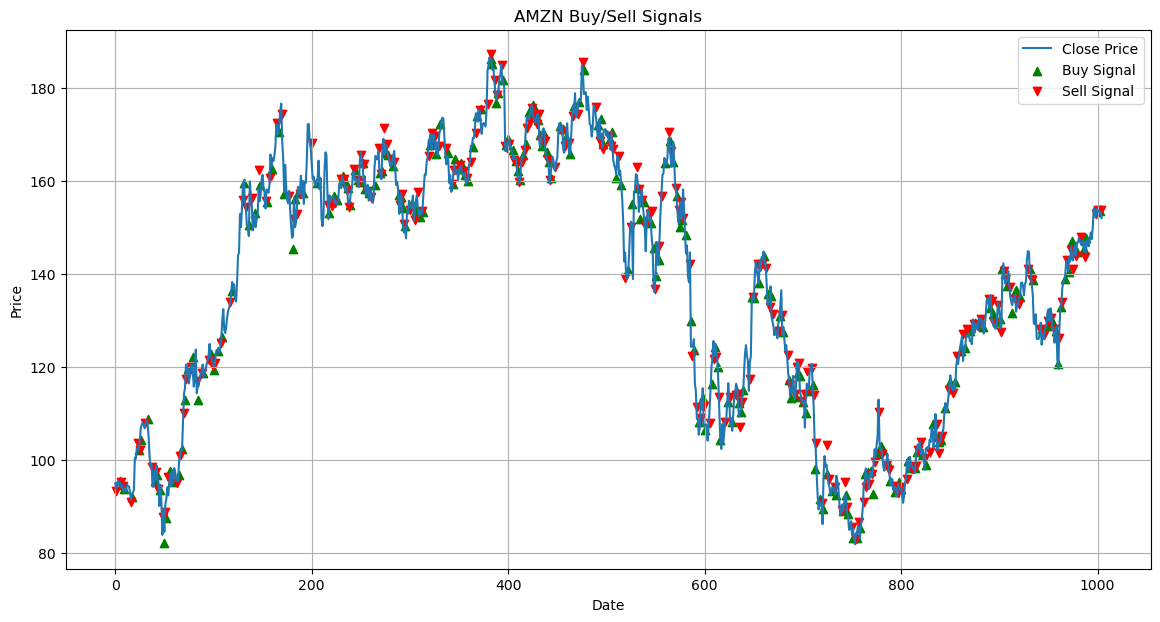

In [40]:

print(f'Final portfolio value: {final_value:.2f}')

# Plotting
plt.figure(figsize=(14, 7))



plt.plot(data_3['Close'], label='Close Price')



buy_dates, buy_prices = zip(*buy_signals) if buy_signals else ([], [])
sell_dates, sell_prices = zip(*sell_signals) if sell_signals else ([], [])

plt.scatter(buy_dates, buy_prices, marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='r', label='Sell Signal', alpha=1)

plt.title(f'{ticker} Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [14]:
constant

1.9000000000000001